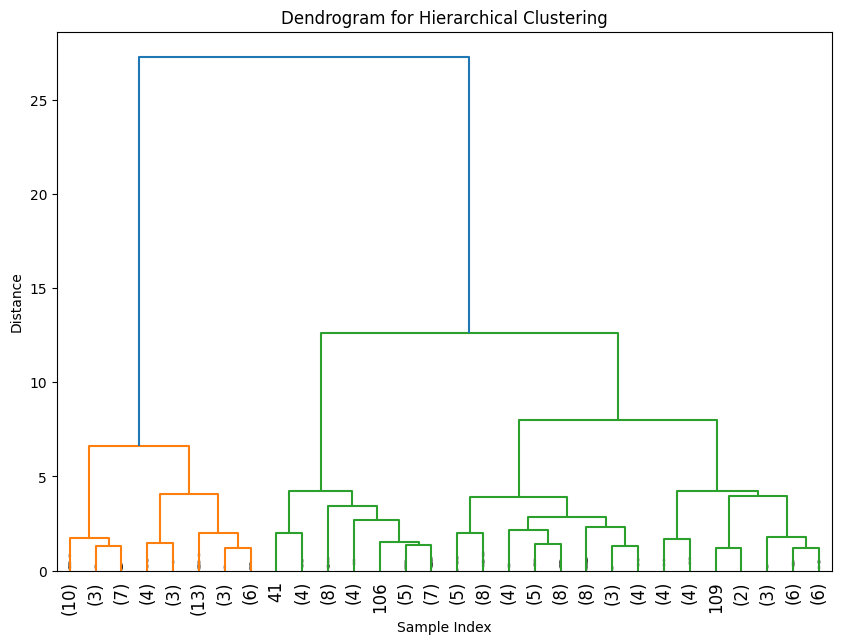

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Cluster  
0          1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the iris dataset
iris = load_iris()
data = iris.data

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform hierarchical/agglomerative clustering
Z = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to form clusters (e.g., form 3 clusters)
clusters = fcluster(Z, t=3, criterion='maxclust')

# Add cluster labels to the dataset
iris_df = pd.DataFrame(data, columns=iris.feature_names)
iris_df['Cluster'] = clusters

# Display the clustered data
print(iris_df)
